In [1]:
import pandas as pd
from pathlib import Path
import sys

# --- ETAPA 1: Configuração de Pastas e Arquivos ---
print("--- Iniciando processo de consolidação (Ambiente Anaconda) ---")

# 1.a: Encontrar o seu "home" (Ex: C:/Users/SeuNome ou /Users/SeuNome)
# Isso torna o script mais robusto e não depende do seu sistema operacional.
pasta_home = Path.home()

# 1.b: Definir o caminho de DADOS (Entrada)
# Baseado no que você informou: /documents/Dados_Acidentes/data/raw
# ATENÇÃO: Verifique se 'documents' é minúsculo ou 'Documents' (maiúsculo)
caminho_dados_raw = pasta_home / "documents" / "Dados_Acidentes" / "data" / "raw"

# 1.c: Definir o caminho de SAÍDA (Onde os arquivos filtrados serão salvos)
# Vamos criar uma nova pasta "processed" para manter tudo organizado
caminho_dados_processed = pasta_home / "documents" / "Dados_Acidentes" / "data" / "processed"

# 1.d: Criar a pasta de "processed" se ela não existir
caminho_dados_processed.mkdir(parents=True, exist_ok=True)

print(f"Lendo arquivos de: {caminho_dados_raw}")
print(f"Salvando arquivos em: {caminho_dados_processed}")

# 1.e: Lista de arquivos que estão na pasta "raw"
# IMPORTANTE: Verifique se os nomes na lista batem EXATAMENTE com os seus arquivos
arquivos_para_processar = [
    'acidentes2025.csv',
    'acidentes2024.csv',
    'acidentes2023.csv',
    'acidentes2022.csv',
    'acidentes2021.csv',
    'acidentes2020.csv',
    'acidentes2019.csv',
    'acidentes2018.csv',
    'acidentes2017.csv'
]

# 1.f: Defina as colunas e filtros
COLUNA_ESTADO = 'uf'
COLUNA_CIDADE = 'municipio'
ESTADO_1 = 'RN'
ESTADO_2 = 'PB'
CIDADE_1 = 'NATAL'
CIDADE_2 = 'JOAO PESSOA'

# 1.g: Listas vazias para guardar os "pedaços" de DataFrame
lista_df_rn = []
lista_df_pb = []
lista_df_natal = []
lista_df_jp = []

# --- ETAPA 2: Loop de Processamento (Carregar, Filtrar, Guardar) ---
print("\n--- ETAPA 2: Processando cada arquivo um por um... ---")

for nome_arquivo in arquivos_para_processar:
    # Monta o caminho completo para o arquivo de entrada
    caminho_completo_arquivo = caminho_dados_raw / nome_arquivo
    
    print(f"Processando arquivo: {caminho_completo_arquivo}...")
    try:
        # 2.a: Carregar o arquivo do ano (a leitura agora é local!)
        df_temp = pd.read_csv(
            caminho_completo_arquivo,
            encoding='latin1',
            delimiter=';',
            on_bad_lines='warn'
        )
        
        # 2.b: Filtrar por ESTADO (RN)
        df_temp_rn = df_temp[df_temp[COLUNA_ESTADO] == ESTADO_1].copy()
        lista_df_rn.append(df_temp_rn)
        
        # 2.c: Filtrar por ESTADO (PB)
        df_temp_pb = df_temp[df_temp[COLUNA_ESTADO] == ESTADO_2].copy()
        lista_df_pb.append(df_temp_pb)
        
        # 2.d: Filtrar por CIDADE (Natal)
        df_temp_natal = df_temp[df_temp[COLUNA_CIDADE] == CIDADE_1].copy()
        lista_df_natal.append(df_temp_natal)
        
        # 2.e: Filtrar por CIDADE (João Pessoa)
        df_temp_jp = df_temp[df_temp[COLUNA_CIDADE] == CIDADE_2].copy()
        lista_df_jp.append(df_temp_jp)
        
        print(f" -> Concluído: {len(df_temp_rn)} regs (RN), {len(df_temp_pb)} regs (PB)")

    except FileNotFoundError:
        print(f" *** ATENÇÃO: Arquivo NÃO ENCONTRADO: {caminho_completo_arquivo}. Pulando... ***")
        print("     Verifique o nome do arquivo na lista e o nome da pasta 'documents'.")
    except KeyError as e:
        print(f" *** ERRO de Coluna: {e}. Verifique se as colunas 'uf' e 'municipio' existem neste arquivo. ***")
    except Exception as e:
        print(f" *** ERRO inesperado ao processar '{nome_arquivo}': {e} ***")

# --- ETAPA 3: Consolidação Final (Concatenar) ---
print("\n--- ETAPA 3: Consolidando (juntando) todos os anos... ---")

if lista_df_rn: # Verifica se pelo menos um arquivo foi processado
    df_final_rn = pd.concat(lista_df_rn, ignore_index=True)
    df_final_pb = pd.concat(lista_df_pb, ignore_index=True)
    df_final_natal = pd.concat(lista_df_natal, ignore_index=True)
    df_final_jp = pd.concat(lista_df_jp, ignore_index=True)
    
    print("Consolidação concluída.")

    # --- ETAPA 4: Salvar os arquivos "Mestres" ---
    print("\n--- ETAPA 4: Salvando arquivos consolidados finais... ---")
    
    # Nomes dos arquivos de saída
    out_rn = 'acidentes_RN_TODOS_ANOS.csv'
    out_pb = 'acidentes_PB_TODOS_ANOS.csv'
    out_natal = 'acidentes_NATAL_TODOS_ANOS.csv'
    out_jp = 'acidentes_JOAO_PESSOA_TODOS_ANOS.csv'
    
    # Salvando...
    df_final_rn.to_csv(caminho_dados_processed / out_rn, index=False, sep=';', encoding='utf-8-sig')
    print(f"Arquivo '{out_rn}' salvo em '{caminho_dados_processed}' com {len(df_final_rn)} registros.")
    
    df_final_pb.to_csv(caminho_dados_processed / out_pb, index=False, sep=';', encoding='utf-8-sig')
    print(f"Arquivo '{out_pb}' salvo em '{caminho_dados_processed}' com {len(df_final_pb)} registros.")
    
    df_final_natal.to_csv(caminho_dados_processed / out_natal, index=False, sep=';', encoding='utf-8-sig')
    print(f"Arquivo '{out_natal}' salvo em '{caminho_dados_processed}' com {len(df_final_natal)} registros.")
    
    df_final_jp.to_csv(caminho_dados_processed / out_jp, index=False, sep=';', encoding='utf-8-sig')
    print(f"Arquivo '{out_jp}' salvo em '{caminho_dados_processed}' com {len(df_final_jp)} registros.")
    
    print("\nProcesso finalizado! Seus 4 arquivos consolidados estão na pasta 'processed'.")

else:
    print("Nenhum dado foi processado. Verifique os nomes dos arquivos ou o caminho da pasta.")

--- Iniciando processo de consolidação (Ambiente Anaconda) ---
Lendo arquivos de: C:\Users\jadson.chagas.102\documents\Dados_Acidentes\data\raw
Salvando arquivos em: C:\Users\jadson.chagas.102\documents\Dados_Acidentes\data\processed

--- ETAPA 2: Processando cada arquivo um por um... ---
Processando arquivo: C:\Users\jadson.chagas.102\documents\Dados_Acidentes\data\raw\acidentes2025.csv...
 -> Concluído: 6757 regs (RN), 12672 regs (PB)
Processando arquivo: C:\Users\jadson.chagas.102\documents\Dados_Acidentes\data\raw\acidentes2024.csv...
 -> Concluído: 9528 regs (RN), 15600 regs (PB)
Processando arquivo: C:\Users\jadson.chagas.102\documents\Dados_Acidentes\data\raw\acidentes2023.csv...
 -> Concluído: 7922 regs (RN), 12308 regs (PB)
Processando arquivo: C:\Users\jadson.chagas.102\documents\Dados_Acidentes\data\raw\acidentes2022.csv...
 -> Concluído: 6928 regs (RN), 13673 regs (PB)
Processando arquivo: C:\Users\jadson.chagas.102\documents\Dados_Acidentes\data\raw\acidentes2021.csv...
 -

--- ETAPA 5: Análise de Evolução Temporal ---
Carregando arquivo de análise: C:\Users\jadson.chagas.102\documents\Dados_Acidentes\data\processed\acidentes_RN_TODOS_ANOS.csv
Convertendo coluna 'data_inversa' para formato de data...

Total de ocorrências (pessoas envolvidas) em RN por ano:
ano
2017    4369
2018    5526
2019    5787
2020    6111
2021    5911
2022    6928
2023    7922
2024    9528
2025    6757
dtype: int64
Gerando gráfico da evolução de acidentes em RN...


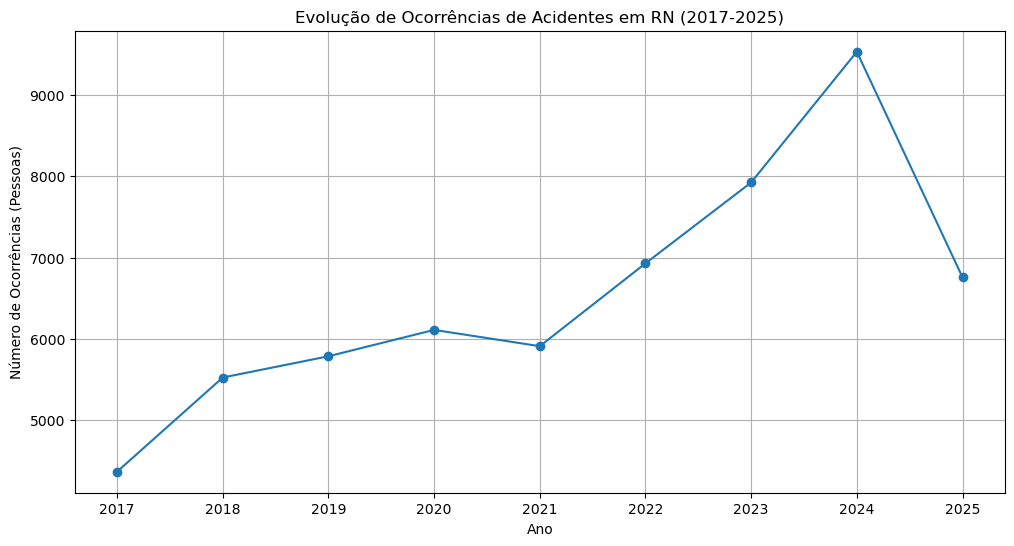

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# --- ETAPA 5: Início da Análise Exploratória ---
print("--- ETAPA 5: Análise de Evolução Temporal ---")

# 1. Definir o caminho da pasta 'processed'
# (Usando o mesmo método de antes)
pasta_home = Path.home()
caminho_dados_processed = pasta_home / "documents" / "Dados_Acidentes" / "data" / "processed"

# 2. Definir qual arquivo vamos analisar
# Vamos começar com o de RN.
arquivo_para_analise = 'acidentes_RN_TODOS_ANOS.csv'
caminho_completo = caminho_dados_processed / arquivo_para_analise

print(f"Carregando arquivo de análise: {caminho_completo}")

# 3. Carregar o arquivo consolidado
try:
    df_analise_rn = pd.read_csv(
        caminho_completo,
        delimiter=';',
        encoding='utf-8-sig' # Lembre-se que salvamos em 'utf-8-sig'
    )
    
    # 4. TRATAMENTO DE DATAS
    # Com base no seu notebook original, a coluna de data é 'data_inversa'
    # Vamos convertê-la para um formato de data que o pandas entende
    print("Convertendo coluna 'data_inversa' para formato de data...")
    df_analise_rn['data_inversa'] = pd.to_datetime(df_analise_rn['data_inversa'])
    
    # 5. Criar uma coluna 'ano'
    # Extraímos apenas o ano da data para poder agrupar
    df_analise_rn['ano'] = df_analise_rn['data_inversa'].dt.year
    
    # 6. AGRUPAR POR ANO
    # .size() conta o número de linhas (ocorrências) para cada ano
    acidentes_por_ano_rn = df_analise_rn.groupby('ano').size()
    
    print("\nTotal de ocorrências (pessoas envolvidas) em RN por ano:")
    print(acidentes_por_ano_rn)
    
    # 7. PLOTAR O GRÁFICO
    print("Gerando gráfico da evolução de acidentes em RN...")
    
    # Define o tamanho do gráfico
    plt.figure(figsize=(12, 6))
    
    # Cria o gráfico de linha
    acidentes_por_ano_rn.plot(
        kind='line', 
        marker='o', # Adiciona um marcador de 'bolinha' em cada ano
        title='Evolução de Ocorrências de Acidentes em RN (2017-2025)'
    )
    
    plt.ylabel('Número de Ocorrências (Pessoas)')
    plt.xlabel('Ano')
    plt.grid(True) # Adiciona um grid para facilitar a leitura
    plt.show() # Exibe o gráfico no notebook

except FileNotFoundError:
    print(f"ERRO: O arquivo '{arquivo_para_analise}' não foi encontrado em '{caminho_dados_processed}'")
except KeyError as e:
    print(f"ERRO: A coluna {e} não foi encontrada. Verifique o nome da coluna de data (ex: 'data_inversa')")
except Exception as e:
    print(f"Ocorreu um erro inesperado na análise: {e}")

--- ETAPA 6: Análise Comparativa de Evolução (RN vs. PB) ---
Carregando e processando: acidentes_RN_TODOS_ANOS.csv
Carregando e processando: acidentes_PB_TODOS_ANOS.csv

--- Total de ocorrências por ano (RN) ---
ano
2017    4369
2018    5526
2019    5787
2020    6111
2021    5911
2022    6928
2023    7922
2024    9528
2025    6757
dtype: int64

--- Total de ocorrências por ano (PB) ---
ano
2017     7746
2018     7863
2019     7943
2020    10030
2021    11142
2022    13673
2023    12308
2024    15600
2025    12672
dtype: int64

Gerando gráfico comparativo...


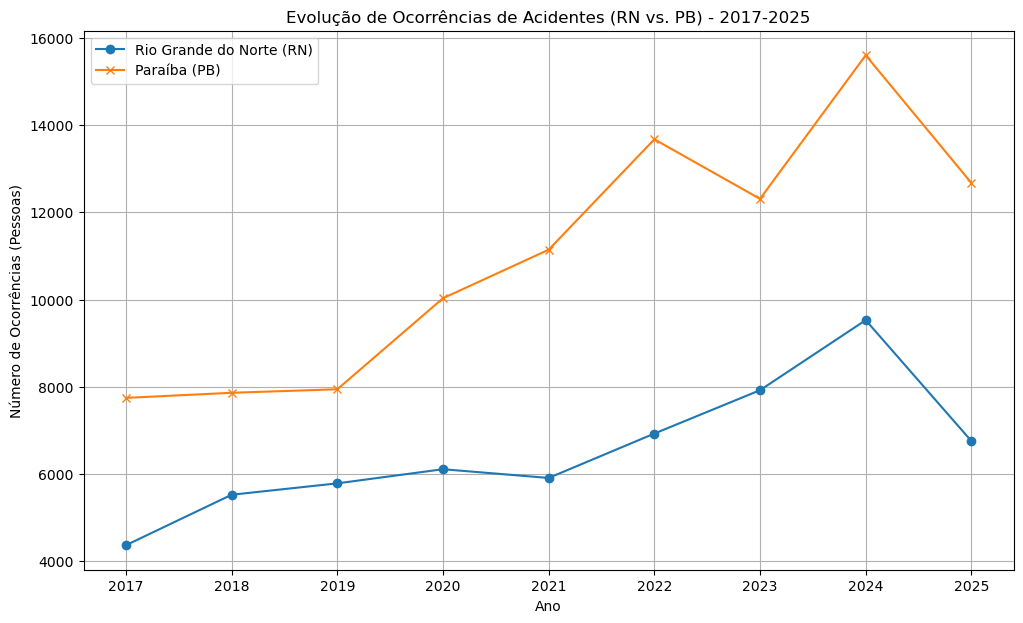

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# --- ETAPA 6: Análise Comparativa (RN vs. PB) ---
print("--- ETAPA 6: Análise Comparativa de Evolução (RN vs. PB) ---")

# 1. Definir o caminho da pasta 'processed'
pasta_home = Path.home()
caminho_dados_processed = pasta_home / "documents" / "Dados_Acidentes" / "data" / "processed"

# 2. Nomes dos arquivos consolidados
arquivo_rn = 'acidentes_RN_TODOS_ANOS.csv'
arquivo_pb = 'acidentes_PB_TODOS_ANOS.csv'

try:
    # 3. Carregar e processar dados de RN
    print(f"Carregando e processando: {arquivo_rn}")
    df_rn = pd.read_csv(caminho_dados_processed / arquivo_rn, delimiter=';', encoding='utf-8-sig')
    df_rn['data_inversa'] = pd.to_datetime(df_rn['data_inversa'])
    df_rn['ano'] = df_rn['data_inversa'].dt.year
    acidentes_por_ano_rn = df_rn.groupby('ano').size()
    
    # 4. Carregar e processar dados de PB
    print(f"Carregando e processando: {arquivo_pb}")
    df_pb = pd.read_csv(caminho_dados_processed / arquivo_pb, delimiter=';', encoding='utf-8-sig')
    df_pb['data_inversa'] = pd.to_datetime(df_pb['data_inversa'])
    df_pb['ano'] = df_pb['data_inversa'].dt.year
    acidentes_por_ano_pb = df_pb.groupby('ano').size()
    
    # 5. Imprimir os dados consolidados
    print("\n--- Total de ocorrências por ano (RN) ---")
    print(acidentes_por_ano_rn)
    print("\n--- Total de ocorrências por ano (PB) ---")
    print(acidentes_por_ano_pb)
    
    # 6. PLOTAR O GRÁFICO COMPARATIVO
    print("\nGerando gráfico comparativo...")
    
    plt.figure(figsize=(12, 7)) # Um pouco maior para caber a legenda
    
    # Plotar a linha de RN
    acidentes_por_ano_rn.plot(
        kind='line', 
        marker='o',
        label='Rio Grande do Norte (RN)' # Adiciona uma legenda
    )
    
    # Plotar a linha de PB
    acidentes_por_ano_pb.plot(
        kind='line', 
        marker='x', # Marcador diferente para diferenciar
        label='Paraíba (PB)' # Adiciona uma legenda
    )
    
    plt.title('Evolução de Ocorrências de Acidentes (RN vs. PB) - 2017-2025')
    plt.ylabel('Número de Ocorrências (Pessoas)')
    plt.xlabel('Ano')
    plt.legend() # <-- Isso é o comando que exibe a legenda
    plt.grid(True)
    plt.show()

except FileNotFoundError as e:
    print(f"ERRO: Arquivo não encontrado. {e}")
except KeyError as e:
    print(f"ERRO: A coluna {e} não foi encontrada.")
except Exception as e:
    print(f"Ocorreu um erro inesperado na análise: {e}")

--- ETAPA 7: Análise Comparativa de Evolução (Natal vs. JP) ---
Carregando e processando: acidentes_NATAL_TODOS_ANOS.csv
Carregando e processando: acidentes_JOAO_PESSOA_TODOS_ANOS.csv

--- Total de ocorrências por ano (Natal) ---
ano
2017     712
2018     886
2019    1058
2020    1039
2021    1073
2022    1018
2023    1368
2024    1839
2025    1216
dtype: int64

--- Total de ocorrências por ano (João Pessoa) ---
ano
2017    1678
2018    1716
2019    1935
2020    1967
2021    2344
2022    2350
2023    2670
2024    3802
2025    3150
dtype: int64

Gerando gráfico comparativo (Natal vs. João Pessoa)...


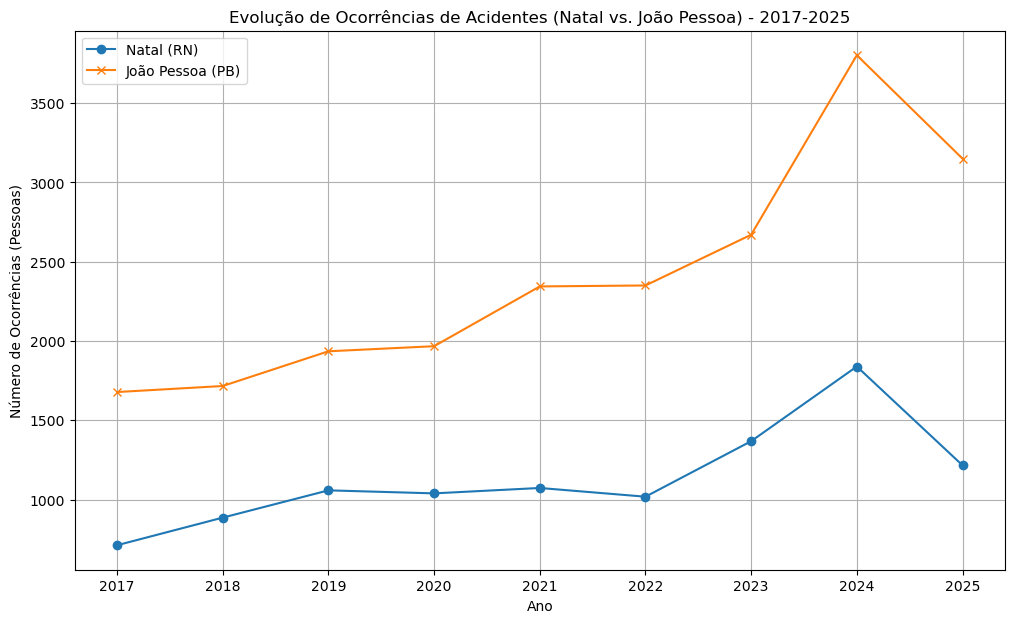

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# --- ETAPA 7: Análise Comparativa (Natal vs. João Pessoa) ---
print("--- ETAPA 7: Análise Comparativa de Evolução (Natal vs. JP) ---")

# 1. Definir o caminho da pasta 'processed'
pasta_home = Path.home()
caminho_dados_processed = pasta_home / "documents" / "Dados_Acidentes" / "data" / "processed"

# 2. Nomes dos arquivos consolidados das cidades
arquivo_natal = 'acidentes_NATAL_TODOS_ANOS.csv'
arquivo_jp = 'acidentes_JOAO_PESSOA_TODOS_ANOS.csv'

try:
    # 3. Carregar e processar dados de Natal
    print(f"Carregando e processando: {arquivo_natal}")
    df_natal = pd.read_csv(caminho_dados_processed / arquivo_natal, delimiter=';', encoding='utf-8-sig')
    df_natal['data_inversa'] = pd.to_datetime(df_natal['data_inversa'])
    df_natal['ano'] = df_natal['data_inversa'].dt.year
    acidentes_por_ano_natal = df_natal.groupby('ano').size()
    
    # 4. Carregar e processar dados de João Pessoa
    print(f"Carregando e processando: {arquivo_jp}")
    df_jp = pd.read_csv(caminho_dados_processed / arquivo_jp, delimiter=';', encoding='utf-8-sig')
    df_jp['data_inversa'] = pd.to_datetime(df_jp['data_inversa'])
    df_jp['ano'] = df_jp['data_inversa'].dt.year
    acidentes_por_ano_jp = df_jp.groupby('ano').size()
    
    # 5. Imprimir os dados consolidados
    print("\n--- Total de ocorrências por ano (Natal) ---")
    print(acidentes_por_ano_natal)
    print("\n--- Total de ocorrências por ano (João Pessoa) ---")
    print(acidentes_por_ano_jp)
    
    # 6. PLOTAR O GRÁFICO COMPARATIVO
    print("\nGerando gráfico comparativo (Natal vs. João Pessoa)...")
    
    plt.figure(figsize=(12, 7))
    
    # Plotar a linha de Natal
    acidentes_por_ano_natal.plot(
        kind='line', 
        marker='o',
        label='Natal (RN)'
    )
    
    # Plotar a linha de João Pessoa
    acidentes_por_ano_jp.plot(
        kind='line', 
        marker='x',
        label='João Pessoa (PB)'
    )
    
    plt.title('Evolução de Ocorrências de Acidentes (Natal vs. João Pessoa) - 2017-2025')
    plt.ylabel('Número de Ocorrências (Pessoas)')
    plt.xlabel('Ano')
    plt.legend()
    plt.grid(True)
    plt.show()

except FileNotFoundError as e:
    print(f"ERRO: Arquivo não encontrado. {e}")
except KeyError as e:
    print(f"ERRO: A coluna {e} não foi encontrada.")
except Exception as e:
    print(f"Ocorreu um erro inesperado na análise: {e}")

--- ETAPA 8: Análise das Causas de Acidentes ---
Carregando arquivos de Natal e João Pessoa...

--- Top 5 Causas de Acidentes em Natal ---
causa_acidente
Condutor deixou de manter distância do veículo da frente    1397
Falta de Atenção à Condução                                 1324
Reação tardia ou ineficiente do condutor                     735
Manobra de mudança de faixa                                  685
Não guardar distância de segurança                           676
Name: count, dtype: int64

--- Top 5 Causas de Acidentes em João Pessoa ---
causa_acidente
Ausência de reação do condutor                              2440
Falta de Atenção à Condução                                 2390
Condutor deixou de manter distância do veículo da frente    2272
Reação tardia ou ineficiente do condutor                    2149
Não guardar distância de segurança                          1857
Name: count, dtype: int64

Gerando gráficos de barras para as causas de acidentes...


C:\Users\jadson.chagas.102\AppData\Local\Temp\ipykernel_1452\1902459274.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_causas_natal.values, y=top_5_causas_natal.index, ax=axes[0], palette='viridis')
C:\Users\jadson.chagas.102\AppData\Local\Temp\ipykernel_1452\1902459274.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_causas_jp.values, y=top_5_causas_jp.index, ax=axes[1], palette='plasma')


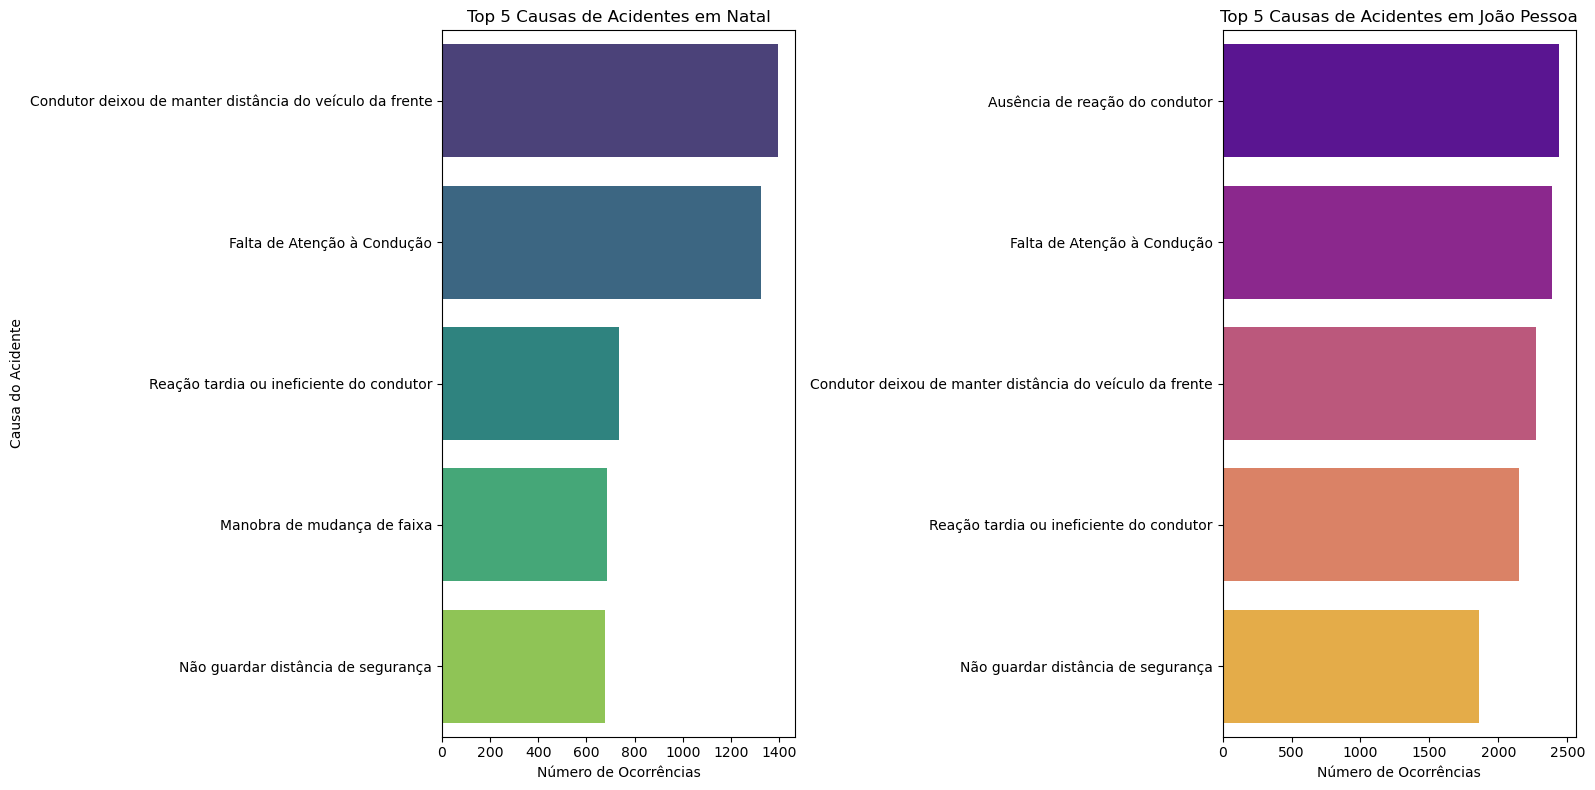

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Usaremos seaborn para gráficos mais bonitos
from pathlib import Path

# --- ETAPA 8: Análise das Causas de Acidentes (Natal vs. JP) ---
print("--- ETAPA 8: Análise das Causas de Acidentes ---")

# 1. Definir o caminho da pasta 'processed'
pasta_home = Path.home()
caminho_dados_processed = pasta_home / "documents" / "Dados_Acidentes" / "data" / "processed"

# 2. Nomes dos arquivos consolidados das cidades
arquivo_natal = 'acidentes_NATAL_TODOS_ANOS.csv'
arquivo_jp = 'acidentes_JOAO_PESSOA_TODOS_ANOS.csv'

try:
    # 3. Carregar os DataFrames (se não estiverem na memória)
    print("Carregando arquivos de Natal e João Pessoa...")
    df_natal = pd.read_csv(caminho_dados_processed / arquivo_natal, delimiter=';', encoding='utf-8-sig')
    df_jp = pd.read_csv(caminho_dados_processed / arquivo_jp, delimiter=';', encoding='utf-8-sig')
    
    # 4. Contar as causas de acidente mais comuns em cada cidade
    # O método .value_counts() conta a ocorrência de cada valor único na coluna.
    # .head(5) pega os 5 mais comuns.
    top_5_causas_natal = df_natal['causa_acidente'].value_counts().head(5)
    top_5_causas_jp = df_jp['causa_acidente'].value_counts().head(5)
    
    print("\n--- Top 5 Causas de Acidentes em Natal ---")
    print(top_5_causas_natal)
    
    print("\n--- Top 5 Causas de Acidentes em João Pessoa ---")
    print(top_5_causas_jp)
    
    # 5. PLOTAR GRÁFICOS COMPARATIVOS DE CAUSAS
    print("\nGerando gráficos de barras para as causas de acidentes...")
    
    # Criamos uma figura com dois subplots (um ao lado do outro)
    fig, axes = plt.subplots(1, 2, figsize=(16, 8)) # 1 linha, 2 colunas
    
    # Gráfico para Natal
    sns.barplot(x=top_5_causas_natal.values, y=top_5_causas_natal.index, ax=axes[0], palette='viridis')
    axes[0].set_title('Top 5 Causas de Acidentes em Natal')
    axes[0].set_xlabel('Número de Ocorrências')
    axes[0].set_ylabel('Causa do Acidente')
    
    # Gráfico para João Pessoa
    sns.barplot(x=top_5_causas_jp.values, y=top_5_causas_jp.index, ax=axes[1], palette='plasma')
    axes[1].set_title('Top 5 Causas de Acidentes em João Pessoa')
    axes[1].set_xlabel('Número de Ocorrências')
    axes[1].set_ylabel('') # Remove o Y-label para não poluir
    
    # Ajusta o layout para evitar sobreposição
    plt.tight_layout()
    plt.show()

except FileNotFoundError as e:
    print(f"ERRO: Arquivo não encontrado. {e}")
except KeyError as e:
    print(f"ERRO: A coluna 'causa_acidente' não foi encontrada. {e}")
except Exception as e:
    print(f"Ocorreu um erro inesperado na análise: {e}")

--- ETAPA 8 (CORRIGIDA): Análise das Causas de Acidentes ---
Carregando arquivos de Natal e João Pessoa...

--- Top 5 Causas de Acidentes em Natal ---
causa_acidente
Condutor deixou de manter distância do veículo da frente    1397
Falta de Atenção à Condução                                 1324
Reação tardia ou ineficiente do condutor                     735
Manobra de mudança de faixa                                  685
Não guardar distância de segurança                           676
Name: count, dtype: int64

--- Top 5 Causas de Acidentes em João Pessoa ---
causa_acidente
Ausência de reação do condutor                              2440
Falta de Atenção à Condução                                 2390
Condutor deixou de manter distância do veículo da frente    2272
Reação tardia ou ineficiente do condutor                    2149
Não guardar distância de segurança                          1857
Name: count, dtype: int64

Gerando gráficos de barras para as causas de acidentes...


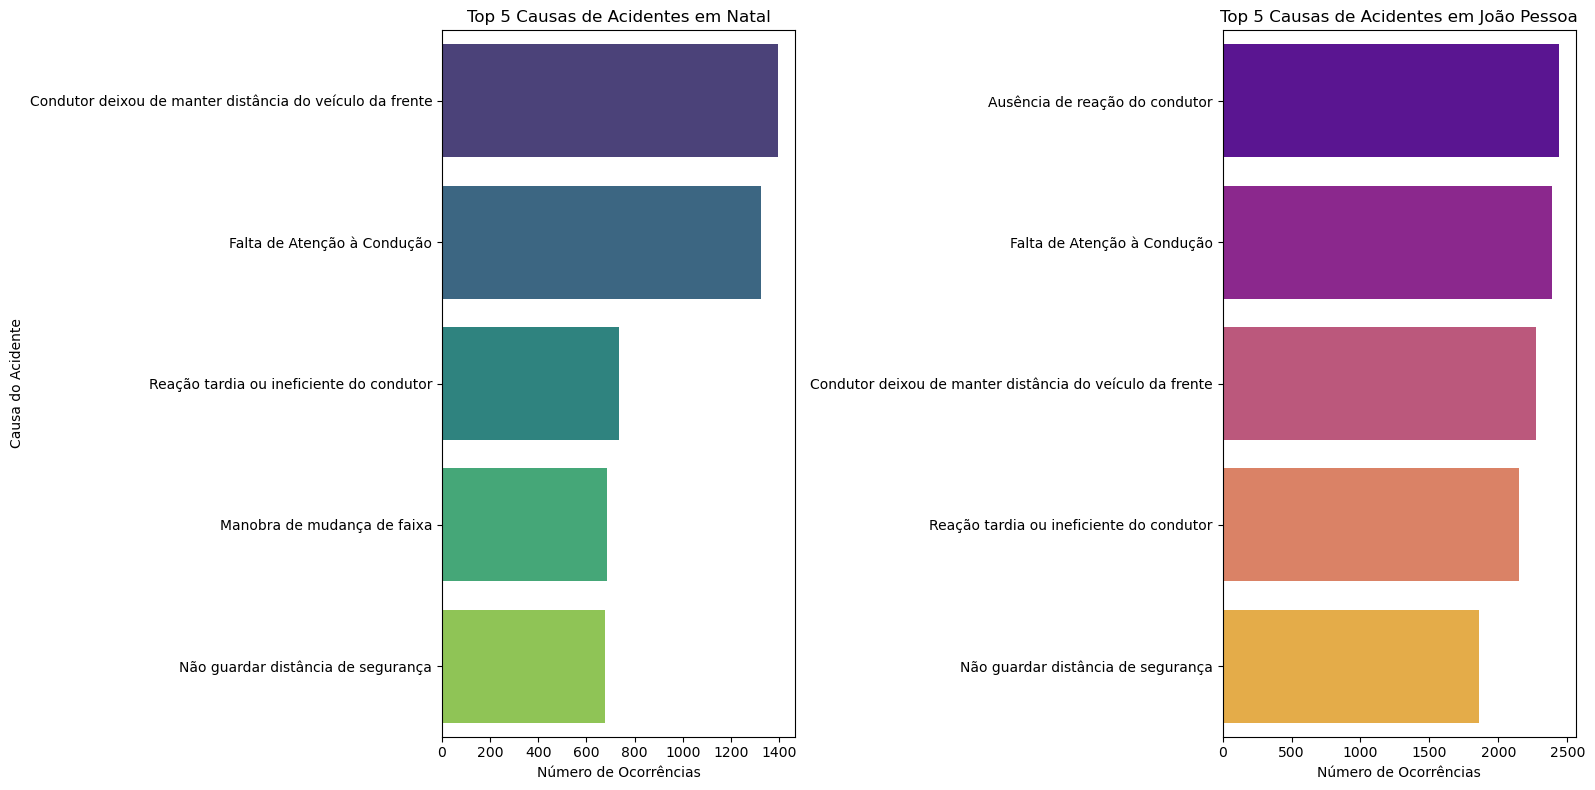

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# --- ETAPA 8 (CORRIGIDA): Análise das Causas de Acidentes ---
print("--- ETAPA 8 (CORRIGIDA): Análise das Causas de Acidentes ---")

# 1. Caminho da pasta
pasta_home = Path.home()
caminho_dados_processed = pasta_home / "documents" / "Dados_Acidentes" / "data" / "processed"

# 2. Nomes dos arquivos
arquivo_natal = 'acidentes_NATAL_TODOS_ANOS.csv'
arquivo_jp = 'acidentes_JOAO_PESSOA_TODOS_ANOS.csv'

try:
    # 3. Carregar os DataFrames
    print("Carregando arquivos de Natal e João Pessoa...")
    df_natal = pd.read_csv(caminho_dados_processed / arquivo_natal, delimiter=';', encoding='utf-8-sig')
    df_jp = pd.read_csv(caminho_dados_processed / arquivo_jp, delimiter=';', encoding='utf-8-sig')
    
    # 4. Contar as causas de acidente
    top_5_causas_natal = df_natal['causa_acidente'].value_counts().head(5)
    top_5_causas_jp = df_jp['causa_acidente'].value_counts().head(5)
    
    print("\n--- Top 5 Causas de Acidentes em Natal ---")
    print(top_5_causas_natal)
    
    print("\n--- Top 5 Causas de Acidentes em João Pessoa ---")
    print(top_5_causas_jp)
    
    # 5. PLOTAR GRÁFICOS (COM A CORREÇÃO DO AVISO)
    print("\nGerando gráficos de barras para as causas de acidentes...")
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    # Gráfico para Natal (Corrigido)
    # Adicionamos 'hue=top_5_causas_natal.index' e 'legend=False'
    sns.barplot(
        x=top_5_causas_natal.values, 
        y=top_5_causas_natal.index, 
        ax=axes[0], 
        palette='viridis',
        hue=top_5_causas_natal.index, # <-- CORREÇÃO
        legend=False                     # <-- CORREÇÃO
    )
    axes[0].set_title('Top 5 Causas de Acidentes em Natal')
    axes[0].set_xlabel('Número de Ocorrências')
    axes[0].set_ylabel('Causa do Acidente')
    
    # Gráfico para João Pessoa (Corrigido)
    # Adicionamos 'hue=top_5_causas_jp.index' e 'legend=False'
    sns.barplot(
        x=top_5_causas_jp.values, 
        y=top_5_causas_jp.index, 
        ax=axes[1], 
        palette='plasma',
        hue=top_5_causas_jp.index,  # <-- CORREÇÃO
        legend=False                      # <-- CORREÇÃO
    )
    axes[1].set_title('Top 5 Causas de Acidentes em João Pessoa')
    axes[1].set_xlabel('Número de Ocorrências')
    axes[1].set_ylabel('')
    
    plt.tight_layout()
    plt.show()

except FileNotFoundError as e:
    print(f"ERRO: Arquivo não encontrado. {e}")
except KeyError as e:
    print(f"ERRO: A coluna 'causa_acidente' não foi encontrada. {e}")
except Exception as e:
    print(f"Ocorreu um erro inesperado na análise: {e}")

--- ETAPA 9: Análise do Tipo de Acidente ---
Carregando arquivos de Natal e João Pessoa...

--- Top 5 Tipos de Acidentes em Natal ---
tipo_acidente
Colisão traseira                 2773
Queda de ocupante de veículo     1563
Tombamento                       1400
Colisão transversal               945
Colisão lateral mesmo sentido     853
Name: count, dtype: int64

--- Top 5 Tipos de Acidentes em João Pessoa ---
tipo_acidente
Queda de ocupante de veículo     4552
Colisão traseira                 4489
Tombamento                       4352
Engavetamento                    1636
Colisão lateral mesmo sentido    1537
Name: count, dtype: int64

Gerando gráficos de barras para os tipos de acidentes...


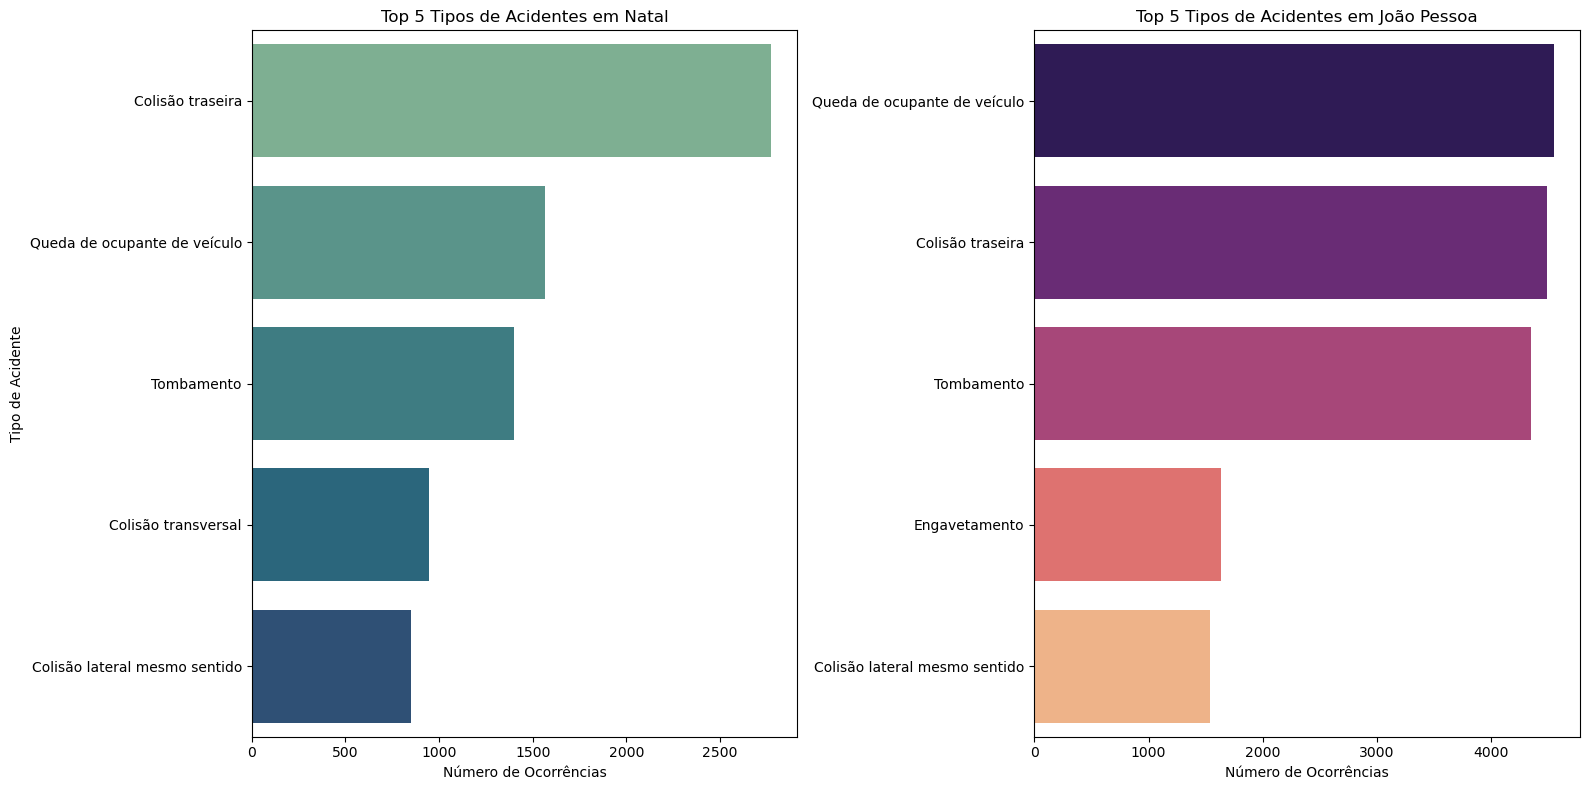

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# --- ETAPA 9: Análise do Tipo de Acidente (Natal vs. JP) ---
print("--- ETAPA 9: Análise do Tipo de Acidente ---")

# 1. Caminho da pasta
pasta_home = Path.home()
caminho_dados_processed = pasta_home / "documents" / "Dados_Acidentes" / "data" / "processed"

# 2. Nomes dos arquivos
arquivo_natal = 'acidentes_NATAL_TODOS_ANOS.csv'
arquivo_jp = 'acidentes_JOAO_PESSOA_TODOS_ANOS.csv'

try:
    # 3. Carregar os DataFrames
    print("Carregando arquivos de Natal e João Pessoa...")
    df_natal = pd.read_csv(caminho_dados_processed / arquivo_natal, delimiter=';', encoding='utf-8-sig')
    df_jp = pd.read_csv(caminho_dados_processed / arquivo_jp, delimiter=';', encoding='utf-8-sig')
    
    # 4. Contar os tipos de acidente mais comuns em cada cidade
    # [cite_start]Usando a coluna 'tipo_acidente' [cite: 16]
    top_5_tipos_natal = df_natal['tipo_acidente'].value_counts().head(5)
    top_5_tipos_jp = df_jp['tipo_acidente'].value_counts().head(5)
    
    print("\n--- Top 5 Tipos de Acidentes em Natal ---")
    print(top_5_tipos_natal)
    
    print("\n--- Top 5 Tipos de Acidentes em João Pessoa ---")
    print(top_5_tipos_jp)
    
    # 5. PLOTAR GRÁFICOS COMPARATIVOS DE TIPOS DE ACIDENTE
    print("\nGerando gráficos de barras para os tipos de acidentes...")
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    # Gráfico para Natal
    sns.barplot(
        x=top_5_tipos_natal.values, 
        y=top_5_tipos_natal.index, 
        ax=axes[0], 
        palette='crest',
        hue=top_5_tipos_natal.index,
        legend=False
    )
    axes[0].set_title('Top 5 Tipos de Acidentes em Natal')
    axes[0].set_xlabel('Número de Ocorrências')
    axes[0].set_ylabel('Tipo de Acidente')
    
    # Gráfico para João Pessoa
    sns.barplot(
        x=top_5_tipos_jp.values, 
        y=top_5_tipos_jp.index, 
        ax=axes[1], 
        palette='magma',
        hue=top_5_tipos_jp.index,
        legend=False
    )
    axes[1].set_title('Top 5 Tipos de Acidentes em João Pessoa')
    axes[1].set_xlabel('Número de Ocorrências')
    axes[1].set_ylabel('')
    
    plt.tight_layout()
    plt.show()

except FileNotFoundError as e:
    print(f"ERRO: Arquivo não encontrado. {e}")
except KeyError as e:
    print(f"ERRO: A coluna 'tipo_acidente' não foi encontrada. {e}")
except Exception as e:
    print(f"Ocorreu um erro inesperado na análise: {e}")

--- ETAPA 10: Análise do Tipo de Veículo Envolvido ---
Carregando arquivos de Natal e João Pessoa...

--- Top 7 Tipos de Veículos Envolvidos em Natal ---
tipo_veiculo
Motocicleta    4026
Automóvel      3776
Caminhonete     616
Caminhão        233
Ônibus          228
Motoneta        173
Camioneta       166
Name: count, dtype: int64

--- Top 7 Tipos de Veículos Envolvidos em João Pessoa ---
tipo_veiculo
Motocicleta    8630
Automóvel      7873
Caminhonete    1190
Caminhão        744
Camioneta       439
Ciclomotor      375
Utilitário      374
Name: count, dtype: int64

Gerando gráficos de barras para os tipos de veículos...


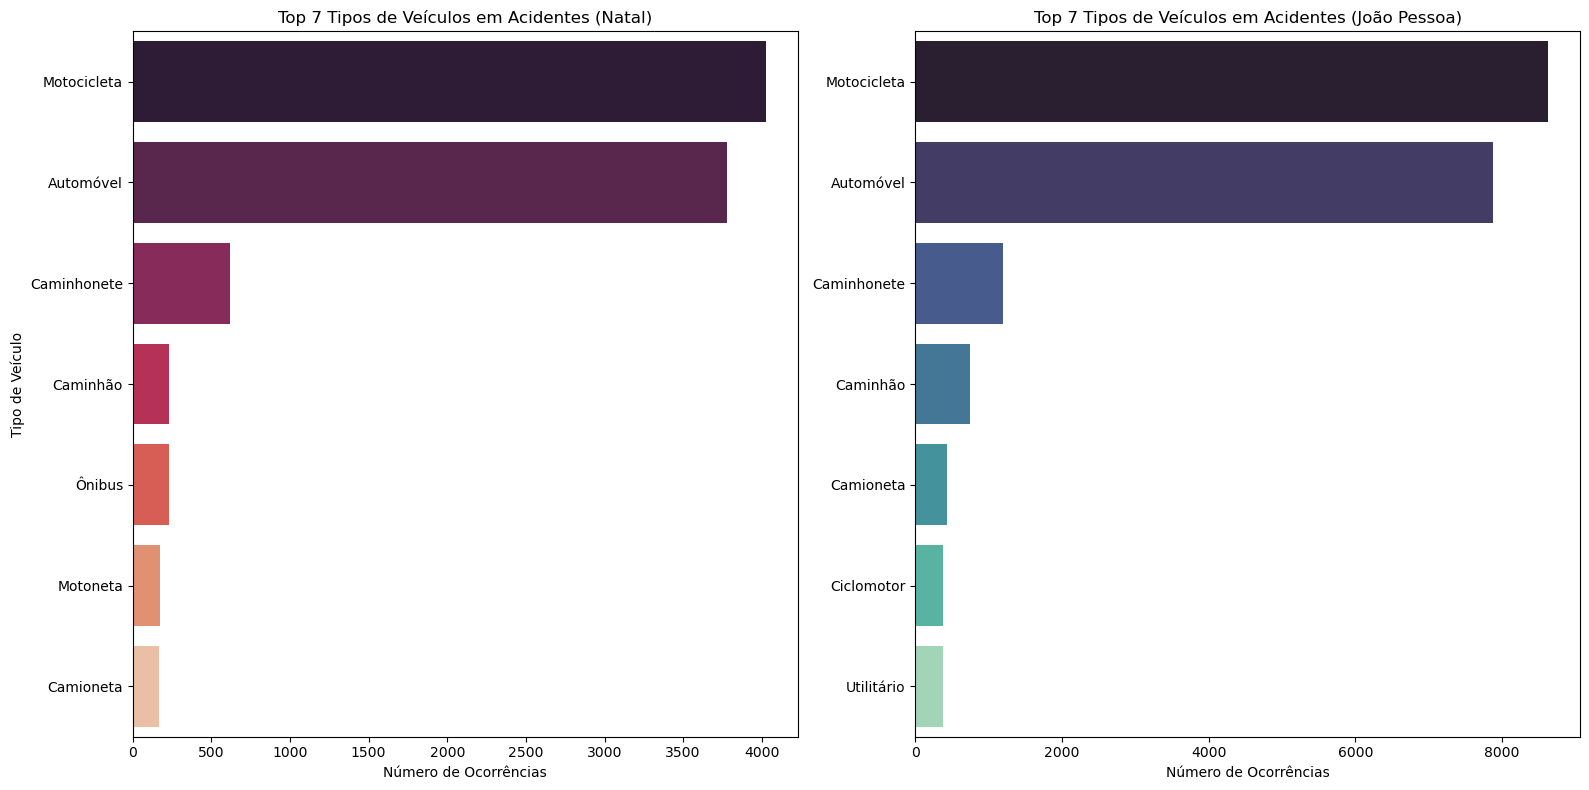

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# --- ETAPA 10: Análise do Tipo de Veículo Envolvido ---
print("--- ETAPA 10: Análise do Tipo de Veículo Envolvido ---")

# 1. Caminho da pasta
pasta_home = Path.home()
caminho_dados_processed = pasta_home / "documents" / "Dados_Acidentes" / "data" / "processed"

# 2. Nomes dos arquivos
arquivo_natal = 'acidentes_NATAL_TODOS_ANOS.csv'
arquivo_jp = 'acidentes_JOAO_PESSOA_TODOS_ANOS.csv'

try:
    # 3. Carregar os DataFrames
    print("Carregando arquivos de Natal e João Pessoa...")
    df_natal = pd.read_csv(caminho_dados_processed / arquivo_natal, delimiter=';', encoding='utf-8-sig')
    df_jp = pd.read_csv(caminho_dados_processed / arquivo_jp, delimiter=';', encoding='utf-8-sig')
    
    # 4. Contar os tipos de veículo mais comuns em cada cidade
    # Usando a coluna 'tipo_veiculo'
    # Vamos pegar o Top 7 para ter uma visão melhor
    top_veiculos_natal = df_natal['tipo_veiculo'].value_counts().head(7)
    top_veiculos_jp = df_jp['tipo_veiculo'].value_counts().head(7)
    
    print("\n--- Top 7 Tipos de Veículos Envolvidos em Natal ---")
    print(top_veiculos_natal)
    
    print("\n--- Top 7 Tipos de Veículos Envolvidos em João Pessoa ---")
    print(top_veiculos_jp)
    
    # 5. PLOTAR GRÁFICOS COMPARATIVOS DE TIPOS DE VEÍCULO
    print("\nGerando gráficos de barras para os tipos de veículos...")
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    # Gráfico para Natal
    sns.barplot(
        x=top_veiculos_natal.values, 
        y=top_veiculos_natal.index, 
        ax=axes[0], 
        palette='rocket',
        hue=top_veiculos_natal.index,
        legend=False
    )
    axes[0].set_title('Top 7 Tipos de Veículos em Acidentes (Natal)')
    axes[0].set_xlabel('Número de Ocorrências')
    axes[0].set_ylabel('Tipo de Veículo')
    
    # Gráfico para João Pessoa
    sns.barplot(
        x=top_veiculos_jp.values, 
        y=top_veiculos_jp.index, 
        ax=axes[1], 
        palette='mako',
        hue=top_veiculos_jp.index,
        legend=False
    )
    axes[1].set_title('Top 7 Tipos de Veículos em Acidentes (João Pessoa)')
    axes[1].set_xlabel('Número de Ocorrências')
    axes[1].set_ylabel('')
    
    plt.tight_layout()
    plt.show()

except FileNotFoundError as e:
    print(f"ERRO: Arquivo não encontrado. {e}")
except KeyError as e:
    print(f"ERRO: A coluna 'tipo_veiculo' não foi encontrada. {e}")
except Exception as e:
    print(f"Ocorreu um erro inesperado na análise: {e}")

--- ETAPA 11: Análise da Gravidade dos Acidentes (Estado Físico) ---
Carregando arquivos de Natal e João Pessoa...

--- Gravidade das Ocorrências em Natal ---
estado_fisico
Ileso            4542
Lesões Leves     3709
Lesões Graves    1090
Não Informado     666
Óbito             163
Name: count, dtype: int64

--- Gravidade das Ocorrências em João Pessoa ---
estado_fisico
Ileso            8562
Lesões Leves     7792
Lesões Graves    2438
Não Informado    2059
Óbito             410
Name: count, dtype: int64

Gerando gráficos de pizza para a proporção da gravidade...


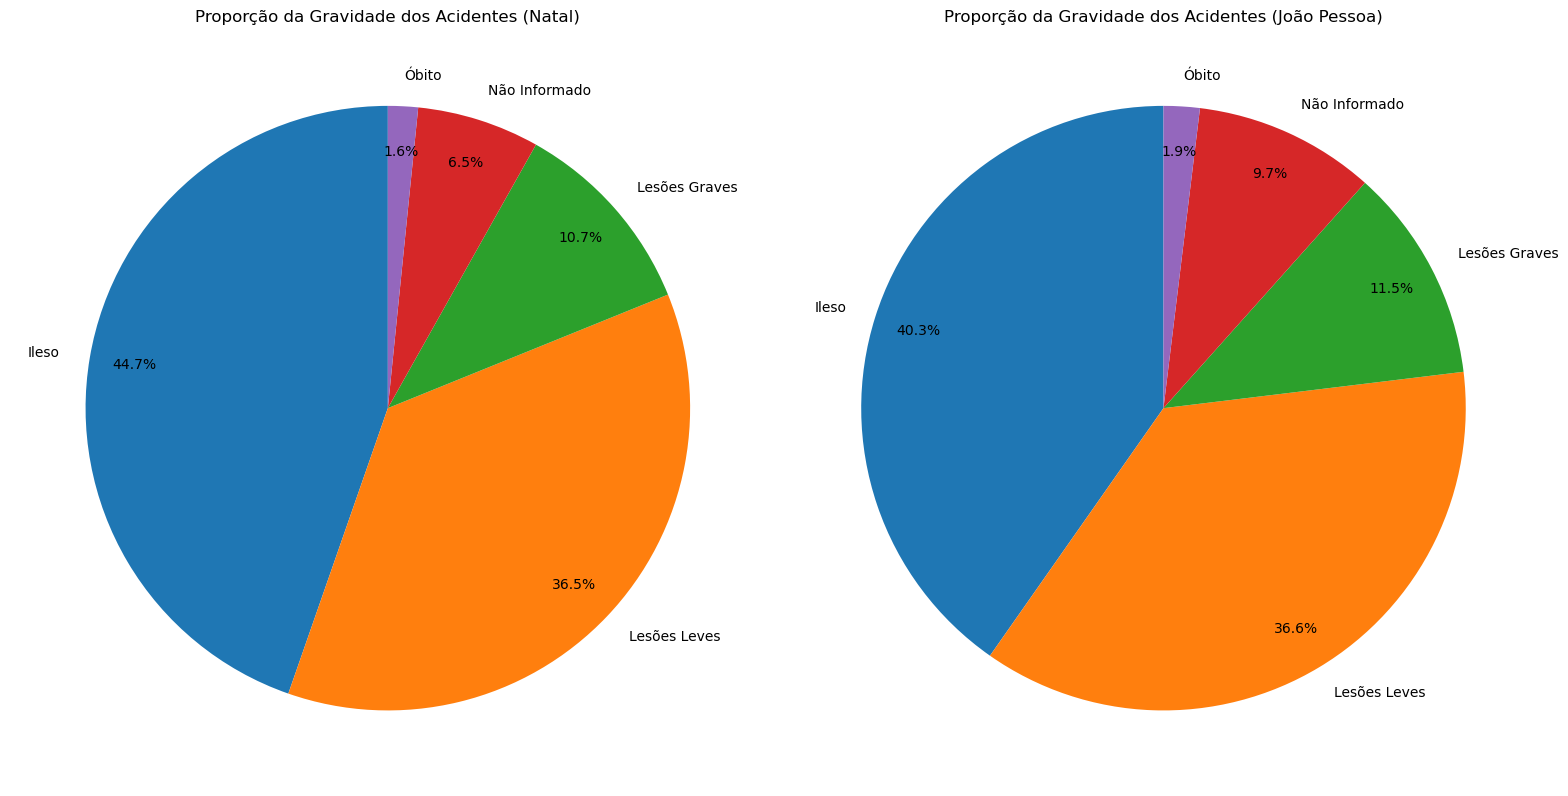

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# --- ETAPA 11: Análise da Gravidade dos Acidentes (Estado Físico) ---
print("--- ETAPA 11: Análise da Gravidade dos Acidentes (Estado Físico) ---")

# 1. Caminho da pasta
pasta_home = Path.home()
caminho_dados_processed = pasta_home / "documents" / "Dados_Acidentes" / "data" / "processed"

# 2. Nomes dos arquivos
arquivo_natal = 'acidentes_NATAL_TODOS_ANOS.csv'
arquivo_jp = 'acidentes_JOAO_PESSOA_TODOS_ANOS.csv'

try:
    # 3. Carregar os DataFrames
    print("Carregando arquivos de Natal e João Pessoa...")
    df_natal = pd.read_csv(caminho_dados_processed / arquivo_natal, delimiter=';', encoding='utf-8-sig')
    df_jp = pd.read_csv(caminho_dados_processed / arquivo_jp, delimiter=';', encoding='utf-8-sig')
    
    # 4. Contar as ocorrências de estado físico em cada cidade
    # Usando a coluna 'estado_fisico'
    gravidade_natal = df_natal['estado_fisico'].value_counts()
    gravidade_jp = df_jp['estado_fisico'].value_counts()
    
    print("\n--- Gravidade das Ocorrências em Natal ---")
    print(gravidade_natal)
    
    print("\n--- Gravidade das Ocorrências em João Pessoa ---")
    print(gravidade_jp)
    
    # 5. PLOTAR GRÁFICOS DE PIZZA (Proporção da Gravidade)
    print("\nGerando gráficos de pizza para a proporção da gravidade...")
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    # Gráfico para Natal
    # 'autopct' formata os números para mostrar a porcentagem
    axes[0].pie(
        gravidade_natal.values, 
        labels=gravidade_natal.index, 
        autopct='%1.1f%%', 
        startangle=90,
        pctdistance=0.85
    )
    axes[0].set_title('Proporção da Gravidade dos Acidentes (Natal)')
    
    # Gráfico para João Pessoa
    axes[1].pie(
        gravidade_jp.values, 
        labels=gravidade_jp.index, 
        autopct='%1.1f%%', 
        startangle=90,
        pctdistance=0.85
    )
    axes[1].set_title('Proporção da Gravidade dos Acidentes (João Pessoa)')
    
    plt.tight_layout()
    plt.show()

except FileNotFoundError as e:
    print(f"ERRO: Arquivo não encontrado. {e}")
except KeyError as e:
    print(f"ERRO: A coluna 'estado_fisico' não foi encontrada. {e}")
except Exception as e:
    print(f"Ocorreu um erro inesperado na análise: {e}")

--- ETAPA 12: Análise de Gravidade Focada em Motocicletas ---
Carregando arquivos de Natal e João Pessoa...

Total de ocorrências com motocicletas em Natal: 4026
Total de ocorrências com motocicletas em João Pessoa: 8630

--- Gravidade das Ocorrências com Motocicletas (Natal) ---
estado_fisico
Lesões Leves     2736
Lesões Graves     769
Ileso             383
Não Informado      94
Óbito              44
Name: count, dtype: int64

--- Gravidade das Ocorrências com Motocicletas (João Pessoa) ---
estado_fisico
Lesões Leves     5611
Lesões Graves    1908
Ileso             528
Não Informado     335
Óbito             248
Name: count, dtype: int64

Gerando gráficos de pizza para a gravidade em acidentes de moto...


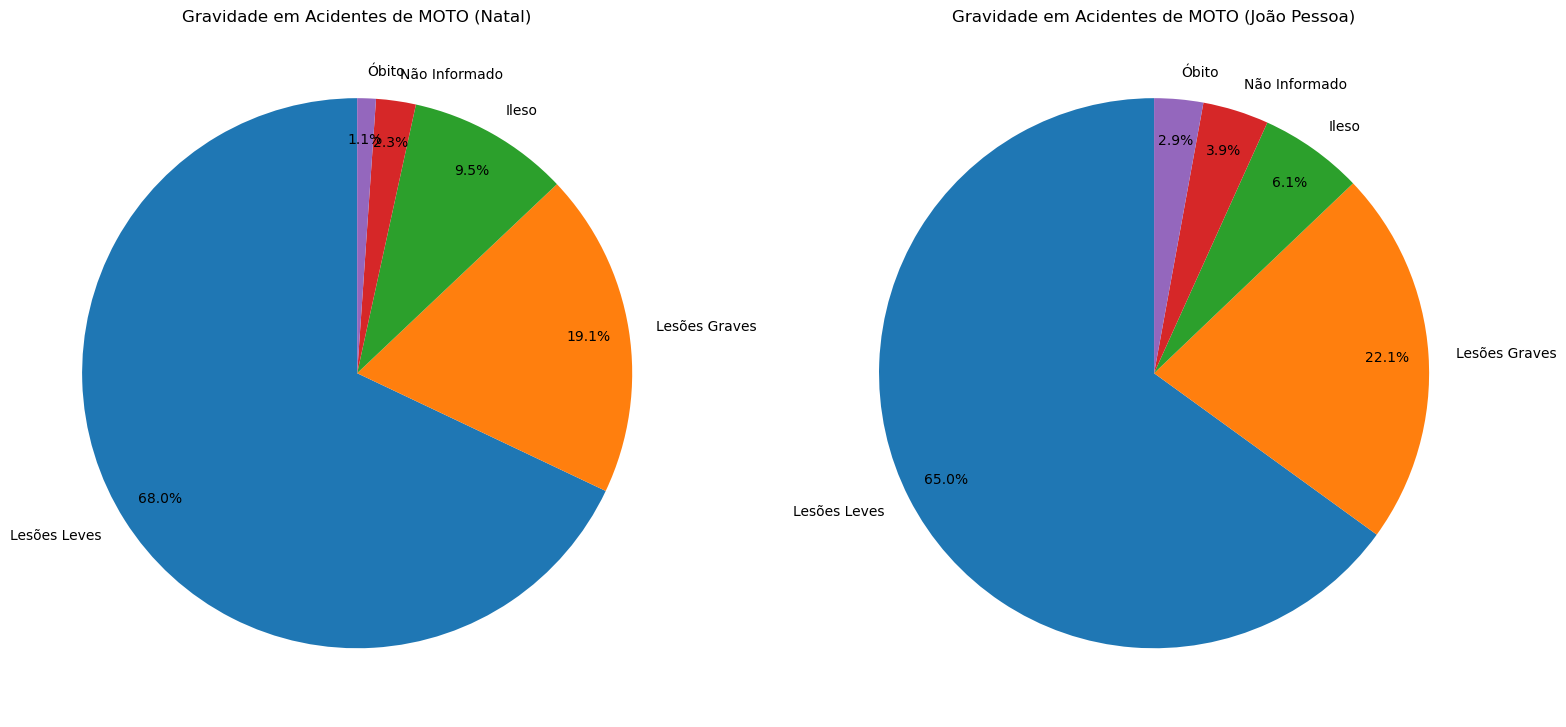

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# --- ETAPA 12: Análise de Gravidade FOCADA em Motocicletas ---
print("--- ETAPA 12: Análise de Gravidade Focada em Motocicletas ---")

# 1. Caminho da pasta
pasta_home = Path.home()
caminho_dados_processed = pasta_home / "documents" / "Dados_Acidentes" / "data" / "processed"

# 2. Nomes dos arquivos
arquivo_natal = 'acidentes_NATAL_TODOS_ANOS.csv'
arquivo_jp = 'acidentes_JOAO_PESSOA_TODOS_ANOS.csv'

try:
    # 3. Carregar os DataFrames
    print("Carregando arquivos de Natal e João Pessoa...")
    df_natal = pd.read_csv(caminho_dados_processed / arquivo_natal, delimiter=';', encoding='utf-8-sig')
    df_jp = pd.read_csv(caminho_dados_processed / arquivo_jp, delimiter=';', encoding='utf-8-sig')
    
    # 4. FILTRAR APENAS PARA MOTOCICLETAS
    # (Usando 'tipo_veiculo' == 'Motocicleta')
    df_motos_natal = df_natal[df_natal['tipo_veiculo'] == 'Motocicleta'].copy()
    df_motos_jp = df_jp[df_jp['tipo_veiculo'] == 'Motocicleta'].copy()
    
    print(f"\nTotal de ocorrências com motocicletas em Natal: {len(df_motos_natal)}")
    print(f"Total de ocorrências com motocicletas em João Pessoa: {len(df_motos_jp)}")

    # 5. Contar o estado físico APENAS dos motociclistas
    gravidade_motos_natal = df_motos_natal['estado_fisico'].value_counts()
    gravidade_motos_jp = df_motos_jp['estado_fisico'].value_counts()
    
    print("\n--- Gravidade das Ocorrências com Motocicletas (Natal) ---")
    print(gravidade_motos_natal)
    
    print("\n--- Gravidade das Ocorrências com Motocicletas (João Pessoa) ---")
    print(gravidade_motos_jp)
    
    # 6. PLOTAR GRÁFICOS DE PIZZA (Proporção da Gravidade)
    print("\nGerando gráficos de pizza para a gravidade em acidentes de moto...")
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    # Gráfico para Natal (Motos)
    axes[0].pie(
        gravidade_motos_natal.values, 
        labels=gravidade_motos_natal.index, 
        autopct='%1.1f%%', 
        startangle=90,
        pctdistance=0.85
    )
    axes[0].set_title('Gravidade em Acidentes de MOTO (Natal)')
    
    # Gráfico para João Pessoa (Motos)
    axes[1].pie(
        gravidade_motos_jp.values, 
        labels=gravidade_motos_jp.index, 
        autopct='%1.1f%%', 
        startangle=90,
        pctdistance=0.85
    )
    axes[1].set_title('Gravidade em Acidentes de MOTO (João Pessoa)')
    
    plt.tight_layout()
    plt.show()

except FileNotFoundError as e:
    print(f"ERRO: Arquivo não encontrado. {e}")
except KeyError as e:
    print(f"ERRO: Coluna 'tipo_veiculo' ou 'estado_fisico' não encontrada. {e}")
except Exception as e:
    print(f"Ocorreu um erro inesperado na análise: {e}")